In [33]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
# Cargar los datos
df = pd.read_csv(r'C:\Users\lucas\High-Frequency_GDP_Forecasting\src\modelo\actualizacion_mensual\variables_ecuaciones_arima\variables_arima_exportaciones.txt', delimiter='\t', parse_dates=["_date_"], index_col="_date_")

# Crear variable diferenciada
df["D_FEXP2"] = df["fexp2"].diff()

# Crear términos rezagados (AR, MA, SMA)
df["AR1"] = df["D_FEXP2"].shift(1)
df["AR4"] = df["D_FEXP2"].shift(4)
df["MA2"] = df["D_FEXP2"].shift(2)
df["MA6"] = df["D_FEXP2"].shift(6)
df["SMA12"] = df["D_FEXP2"].shift(12)
df["SMA24"] = df["D_FEXP2"].shift(24)

# Selección de variables exógenas
exog_vars = ["AR1", "AR4", "MA2", "MA6", "SMA12", "SMA24", "fvirus", "fcexpor"]



Columnas en el DataFrame: ['fexp1', 'fexp2', 'fexp3', 'fexp4', 'fexp5', 'pibuem', 'fvirus', 'fcexpor', 'f202004', 'f202006', 'f202005']


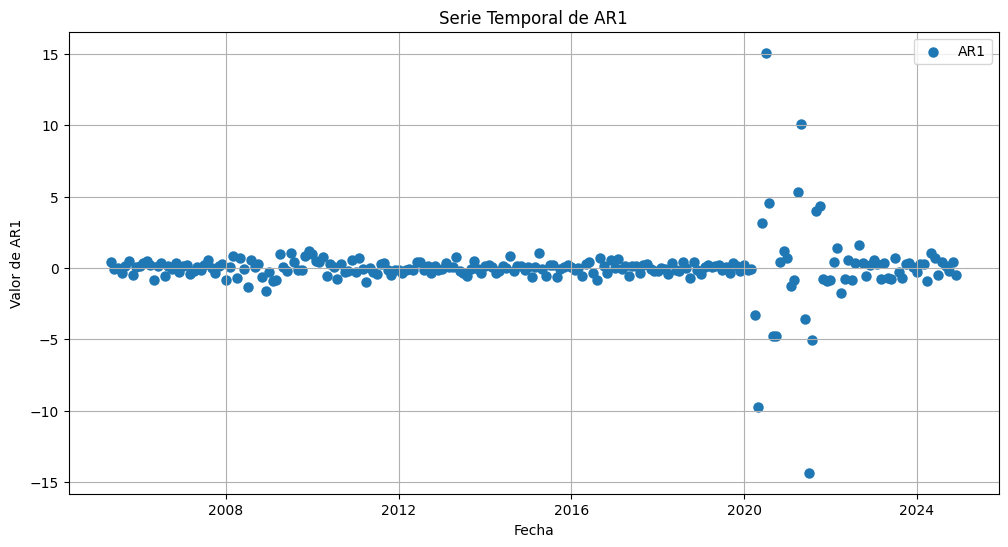

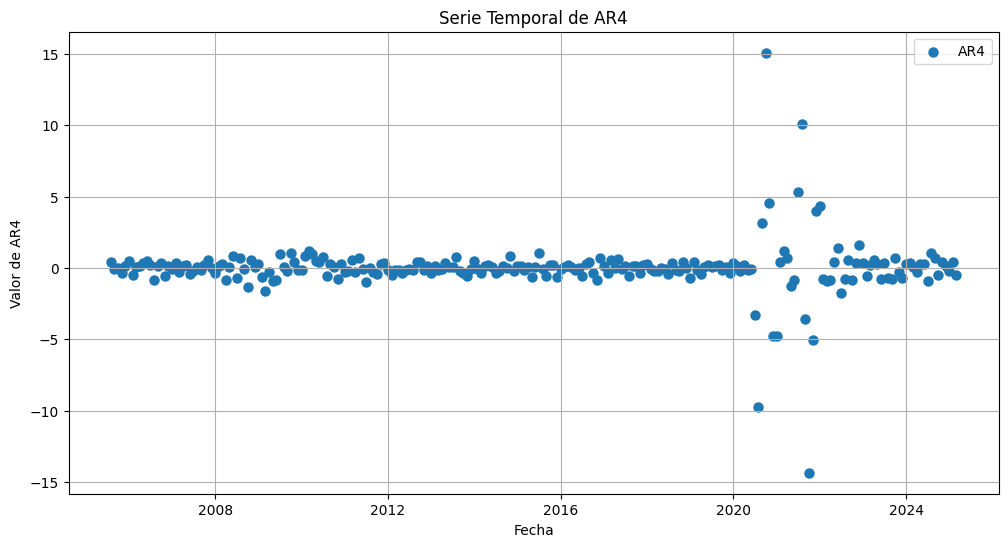

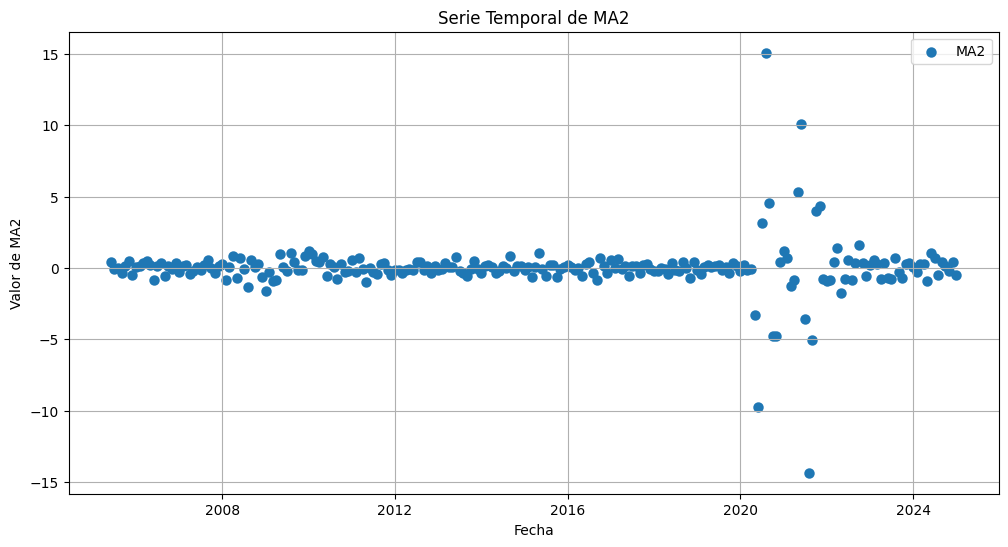

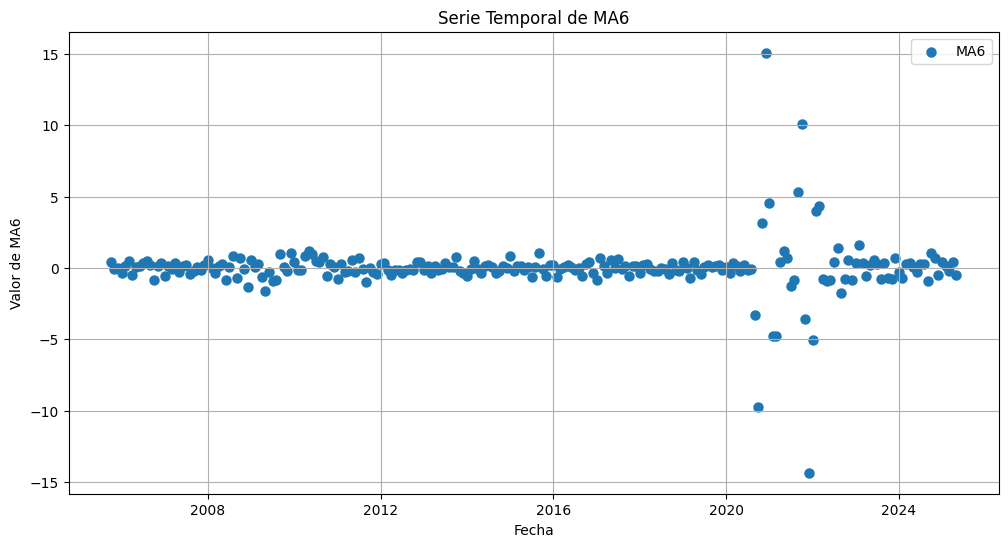

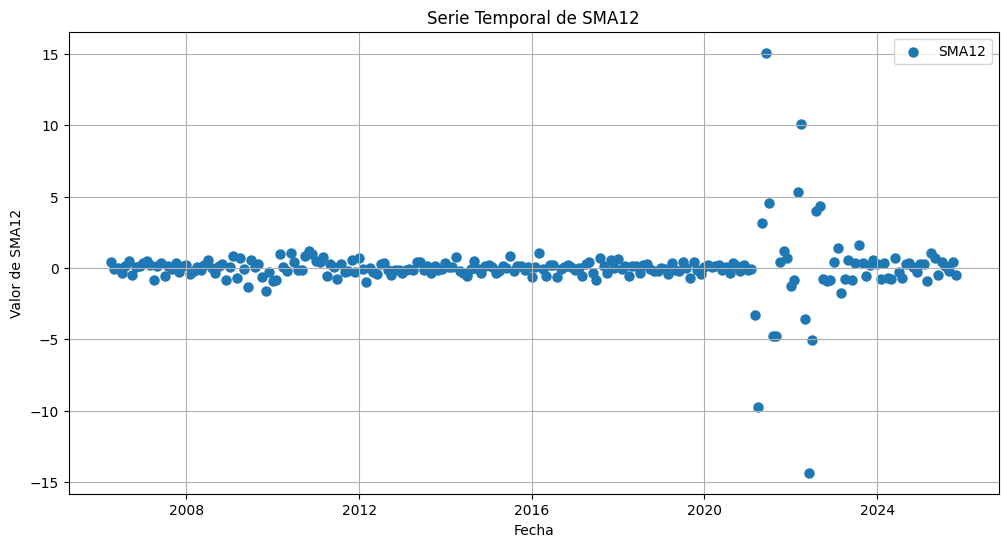

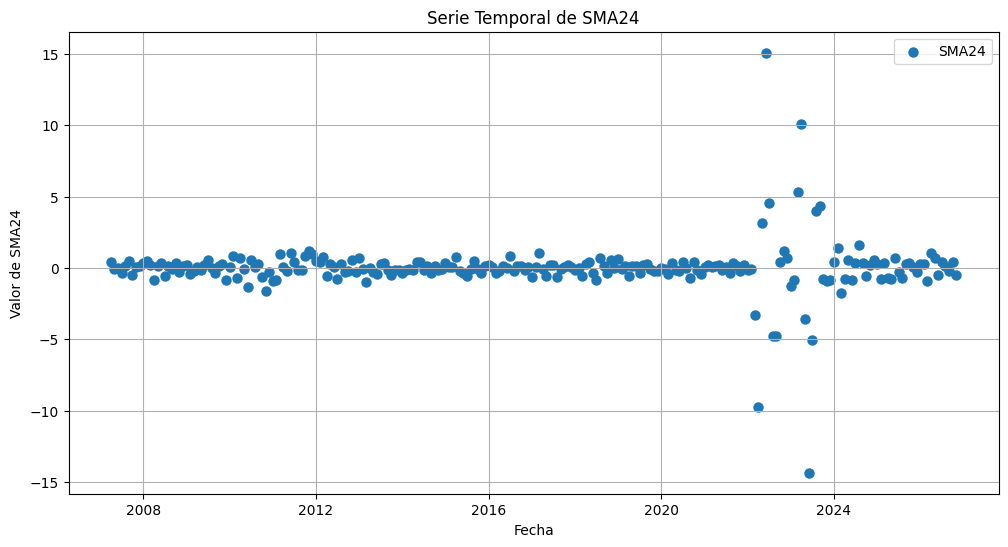

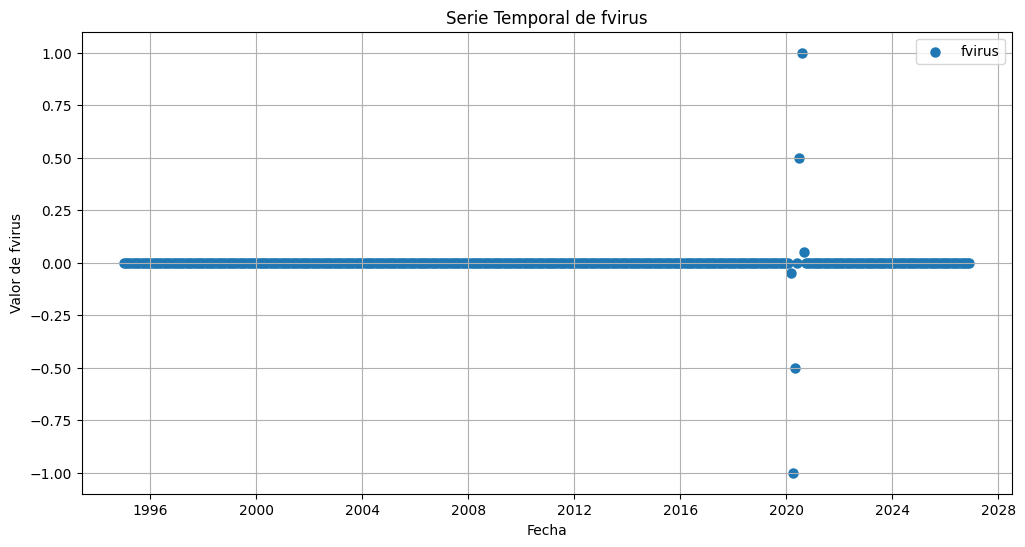

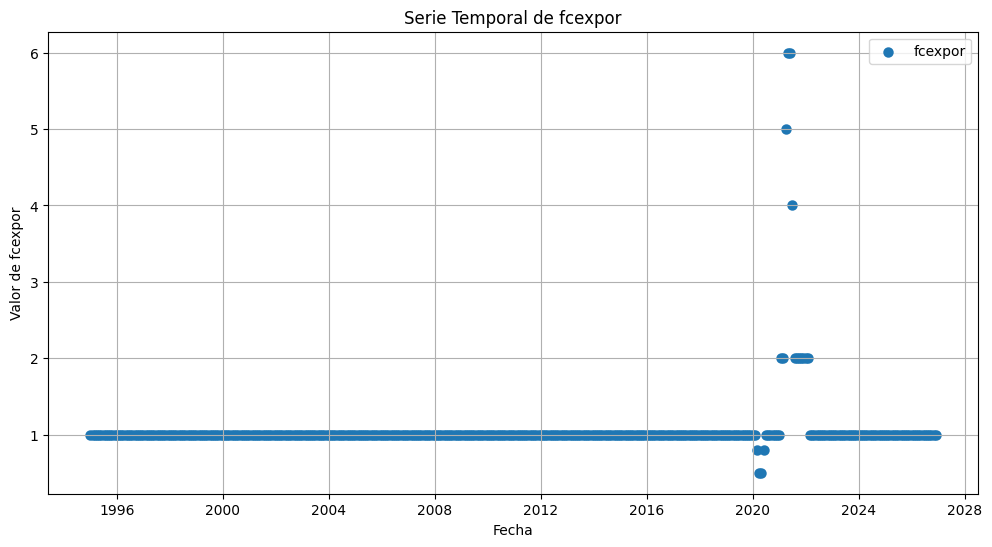

In [42]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os

# Verificar si el archivo existe
file_path = r'C:\Users\lucas\High-Frequency_GDP_Forecasting\src\modelo\actualizacion_mensual\variables_ecuaciones_arima\variables_arima_exportaciones.txt'
if not os.path.exists(file_path):
    raise FileNotFoundError(f"El archivo no se encuentra en la ruta especificada: {file_path}")

# Cargar los datos
df = pd.read_csv(file_path, delimiter='\t', parse_dates=["_date_"], index_col="_date_")

# Mostrar columnas disponibles en el DataFrame
print("Columnas en el DataFrame:", df.columns.tolist())

# Crear variable diferenciada y términos rezagados
df["D_FEXP2"] = df["fexp2"].diff()
df["AR1"] = df["D_FEXP2"].shift(1)
df["AR4"] = df["D_FEXP2"].shift(4)
df["MA2"] = df["D_FEXP2"].shift(2)
df["MA6"] = df["D_FEXP2"].shift(6)
df["SMA12"] = df["D_FEXP2"].shift(12)
df["SMA24"] = df["D_FEXP2"].shift(24)

# Eliminar filas con NaN
# df.dropna(inplace=True)

# Selección de variables exógenas
exog_vars = ["AR1", "AR4", "MA2", "MA6", "SMA12", "SMA24", "fvirus", "fcexpor"]

# Verificar que todas las variables existen antes de graficar
for var in exog_vars:
    if var not in df.columns:
        print(f"⚠ La variable '{var}' no existe en el DataFrame.")

# Graficar cada variable exógena
for var in exog_vars:
    if var in df.columns:
        plt.figure(figsize=(12,6))
        plt.scatter(df.index, df[var], label=var, linewidth=1.5)
        plt.title(f"Serie Temporal de {var}")
        plt.xlabel("Fecha")
        plt.ylabel(f"Valor de {var}")
        plt.legend()
        plt.grid(True)
        plt.show()


In [48]:
# Contar el número de NaN en cada variable exógena
nan_counts = df[exog_vars].isna().sum()
print("Número de NaN por variable:")
print(nan_counts)

Número de NaN por variable:
AR1        148
AR4        148
MA2        148
MA6        148
SMA12      148
SMA24      148
fvirus       0
fcexpor      0
dtype: int64


In [46]:
df

,fexp1,fexp2,fexp3,fexp4,fexp5,pibuem,fvirus,fcexpor,f202004,f202006,f202005,D_FEXP2,AR1,AR4,MA2,MA6,SMA12,SMA24
_date_,,,,,,,,,,,,,,,,,,
1995-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-02-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-03-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-04-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-05-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-08-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.113931
2026-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.181852
2026-10-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.435833


In [29]:

# Asegurar que no haya NaN
df_clean = df.dropna()  # Elimina todas las filas con NaN

# Variables dependiente e independiente
X = df_clean[exog_vars]
X = sm.add_constant(X)  # Agregar constante al modelo
y = df_clean["D_FEXP2"]

# Ajustar el modelo
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                D_FEXP2   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     61.91
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           2.32e-50
Time:                        20:23:27   Log-Likelihood:                -319.83
No. Observations:                 212   AIC:                             657.7
Df Residuals:                     203   BIC:                             687.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0212      0.165     -0.129      0.8

,fvirus,fcexpor
123,0.0,1.0
124,0.0,1.0
125,0.0,1.0
126,0.0,1.0
127,0.0,1.0
...,...,...
354,0.0,1.0
355,0.0,1.0
356,0.0,1.0
357,0.0,1.0


In [14]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Cargar los datos desde un archivo txt, asegurándose de que el delimitador es correcto
data = pd.read_csv(r'C:\Users\lucas\High-Frequency_GDP_Forecasting\src\modelo\actualizacion_mensual\variables_ecuaciones_arima\variables_arima_exportaciones.txt',
                   delimiter='\t', parse_dates=['_date_'], index_col='_date_')

# Filtrar el rango de fechas deseado
data = data.loc['2005-03-01':'2024-11-01']

# Crear la variable dependiente (Diferencia de FEXP2)
data['D(FEXP2)'] = data['fexp2'].diff()

# Definir las variables explicativas
exog_vars = ['fvirus', 'fcexpor']
exog_data = data[exog_vars].iloc[1:]  # Ajustamos por la diferencia

# Definir el modelo SARIMAX con términos ARMA y SMA para replicar EViews
model = SARIMAX(
    data['D(FEXP2)'].iloc[1:],  # Eliminamos el primer valor NaN
    exog=exog_data,
    order=(4, 0, 6),  # AR(1), MA(2)
    seasonal_order=(0, 0, 2, 12),  # SMA(12), SMA(24)
    trend='c',  # Incluir constante como en EViews
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Ajustar el modelo usando ML (máxima verosimilitud) como en EViews
results = model.fit(method='lbfgs', maxiter=500, tol=0.0001)

# Mostrar resumen de resultados
print(results.summary())


C:\Users\lucas\High-Frequency_GDP_Forecasting\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lucas\High-Frequency_GDP_Forecasting\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lucas\High-Frequency_GDP_Forecasting\.venv\lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: tol. After release 0.14, this will raise.
  warnings.warn(


                                        SARIMAX Results                                        
Dep. Variable:                                D(FEXP2)   No. Observations:                  236
Model:             SARIMAX(4, 0, 6)x(0, 0, [1, 2], 12)   Log Likelihood                -273.291
Date:                                 Thu, 13 Feb 2025   AIC                            578.582
Time:                                         17:45:23   BIC                            631.750
Sample:                                     04-01-2005   HQIC                           600.087
                                          - 11-01-2024                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0459      0.072      0.634      0.526      -0.096       0

In [24]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Cargar los datos desde un archivo txt, asegurándose de que el delimitador es correcto
data = pd.read_csv(r'C:\Users\lucas\High-Frequency_GDP_Forecasting\src\modelo\actualizacion_mensual\variables_ecuaciones_arima\variables_arima_exportaciones.txt',
                   delimiter='\t', parse_dates=['_date_'], index_col='_date_')

# Filtrar el rango de fechas deseado
data = data.loc['2005-03-01':'2024-11-01']

# Crear la variable dependiente (Diferencia de FEXP2)
data['D(FEXP2)'] = data['fexp2'].diff()

# Definir las variables explicativas
exog_vars = ['fvirus', 'fcexpor']
exog_data = data[exog_vars].iloc[1:]  # Ajustamos por la diferencia

# Ajustar ARIMA con regresores incluidos para capturar la estructura completa de EViews
model = ARIMA(
    data['D(FEXP2)'].iloc[1:],
    exog=exog_data,
    order=(4, 0, 6),  # AR(1), AR(4), MA(2), MA(6)
    seasonal_order=(0, 0, 2, 12),  # SMA(12), SMA(24)
    trend='c'  # Incluir constante como en EViews
)

# Ajustar el modelo con optimización BFGS usando el argumento correcto
results = model.fit(method_kwargs={'maxiter': 500, 'tol': 0.0001})

# Mostrar resumen de resultados
print(results.summary())


C:\Users\lucas\High-Frequency_GDP_Forecasting\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lucas\High-Frequency_GDP_Forecasting\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lucas\High-Frequency_GDP_Forecasting\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lucas\High-Frequency_GDP_Forecasting\.venv\lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bou

                                       SARIMAX Results                                       
Dep. Variable:                              D(FEXP2)   No. Observations:                  236
Model:             ARIMA(4, 0, 6)x(0, 0, [1, 2], 12)   Log Likelihood                -300.250
Date:                               Thu, 13 Feb 2025   AIC                            632.499
Time:                                       20:19:48   BIC                            687.921
Sample:                                   04-01-2005   HQIC                           654.840
                                        - 11-01-2024                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0439      0.024      1.794      0.073      -0.004       0.092
fvirus     

In [29]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Cargar los datos desde un archivo txt, asegurándose de que el delimitador es correcto
data = pd.read_csv(r'C:\Users\lucas\High-Frequency_GDP_Forecasting\src\modelo\actualizacion_mensual\variables_ecuaciones_arima\variables_arima_exportaciones.txt',
                   delimiter='\t', parse_dates=['_date_'], index_col='_date_')

# Filtrar el rango de fechas deseado
data = data.loc['2005-03-01':'2024-11-01']

# Crear la variable dependiente (Diferencia de FEXP2)
data['D(FEXP2)'] = data['fexp2'].diff()

# Definir las variables explicativas
exog_vars = ['fvirus', 'fcexpor']
exog_data = data[exog_vars].iloc[1:]  # Ajustamos por la diferencia

# Ajustar ARIMA con regresores incluidos para capturar la estructura completa de EViews
model = ARIMA(
    data['D(FEXP2)'].iloc[1:],
    exog=exog_data,
    order=(4, 0, 6),  # AR(1), AR(4), MA(2), MA(6)
    seasonal_order=(0, 0, 2, 12),  # SMA(12), SMA(24)
    trend='c'  # Incluir constante como en EViews
)

# Ajustar el modelo con máxima verosimilitud
results = model.fit()

# Mostrar resumen de resultados
print(results.summary())


C:\Users\lucas\High-Frequency_GDP_Forecasting\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lucas\High-Frequency_GDP_Forecasting\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lucas\High-Frequency_GDP_Forecasting\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                       
Dep. Variable:                              D(FEXP2)   No. Observations:                  236
Model:             ARIMA(4, 0, 6)x(0, 0, [1, 2], 12)   Log Likelihood                -303.668
Date:                               Thu, 13 Feb 2025   AIC                            639.337
Time:                                       20:39:21   BIC                            694.758
Sample:                                   04-01-2005   HQIC                           661.678
                                        - 11-01-2024                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0532      0.031      1.709      0.088      -0.008       0.114
fvirus     

C:\Users\lucas\High-Frequency_GDP_Forecasting\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Cargar los datos desde un archivo txt, asegurándose de que el delimitador es correcto
data = pd.read_csv(r'C:\Users\lucas\High-Frequency_GDP_Forecasting\src\modelo\actualizacion_mensual\variables_ecuaciones_arima\variables_arima_exportaciones.txt',
                   delimiter='\t', parse_dates=['_date_'], index_col='_date_')

# Filtrar el rango de fechas deseado
data = data.loc['2005-03-01':'2024-11-01']

# Crear la variable dependiente (Diferencia de FEXP2)
data['D(FEXP2)'] = data['fexp2'].diff()

# Definir las variables explicativas
exog_vars = ['fvirus', 'fcexpor']
exog_data = data[exog_vars].iloc[1:]  # Ajustamos por la diferencia

# Ajustar ARIMA con regresores incluidos para capturar la estructura completa de EViews
model = ARIMA(
    data['D(FEXP2)'].iloc[1:],
    exog=exog_data,
    order=(4, 0, 6),  # AR(1), AR(4), MA(2), MA(6)
    seasonal_order=(0, 0, 2, 12),  # SMA(12), SMA(24)
    trend='c'  # Incluir constante como en EViews
)

# Ajustar el modelo con máxima verosimilitud
results = model.fit(method_kwargs={'maxiter': 500, 'gtol': 1e-4})

# Mostrar resumen de resultados
print(results.summary())

C:\Users\lucas\High-Frequency_GDP_Forecasting\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lucas\High-Frequency_GDP_Forecasting\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lucas\High-Frequency_GDP_Forecasting\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lucas\High-Frequency_GDP_Forecasting\.venv\lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bou

                                       SARIMAX Results                                       
Dep. Variable:                              D(FEXP2)   No. Observations:                  236
Model:             ARIMA(4, 0, 6)x(0, 0, [1, 2], 12)   Log Likelihood                -300.250
Date:                               Fri, 14 Feb 2025   AIC                            632.499
Time:                                       10:21:19   BIC                            687.921
Sample:                                   04-01-2005   HQIC                           654.840
                                        - 11-01-2024                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0439      0.024      1.794      0.073      -0.004       0.092
fvirus     

In [48]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
#dates = pd.date_range(start='1970-01-01', periods=24, freq='YS')
# Cargar los datos desde un archivo txt, asegurándose de que el delimitador es correcto
data = pd.read_csv(r'C:\Users\lucas\High-Frequency_GDP_Forecasting\src\modelo\actualizacion_mensual\variables_ecuaciones_arima\variables_arima_exportaciones.txt',
                   delimiter='\t', parse_dates=['_date_'], index_col='_date_')
data = data.loc['2005-03-01':'2024-11-01']

# Asegurar que el índice tenga frecuencia mensual
data = data.asfreq('MS')
# Filtrar el rango de fechas deseado
data = data.loc['2005-03-01':'2024-11-01']

# Crear la variable dependiente (Diferencia de FEXP2)
data['D(FEXP2)'] = data['fexp2'].diff()

# Definir las variables explicativas
exog_vars = ['fvirus', 'fcexpor']
exog_data = data[exog_vars].iloc[1:]  # Ajustamos por la diferencia

# Ajustar ARIMA con regresores incluidos para capturar la estructura completa de EViews
ar = (1,4)
ma = (0,1,0,0,0,1)
sma = 2
model = sm.tsa.statespace.SARIMAX(
    data['D(FEXP2)'].iloc[1:],
    exog=exog_data,
    order=(ar, 0, ma),  # AR(1), AR(4), MA(2), MA(6)
    seasonal_order=(0, 1, sma, 12),  # SMA(12), SMA(24)
    enforce_stationarity=False)

# Ajustar el modelo con BFGS y parámetros de optimización similares a EViews
results = model.fit(maxiter=500, pgtol= 0.0001)

# Mostrar resumen de resultados
print(results.summary())


                                          SARIMAX Results                                           
Dep. Variable:                                     D(FEXP2)   No. Observations:                  236
Model:             SARIMAX([1, 4], 0, [2, 6])x(0, 1, 2, 12)   Log Likelihood                -295.872
Date:                                      Fri, 14 Feb 2025   AIC                            609.743
Time:                                              17:07:40   BIC                            639.107
Sample:                                          04-01-2005   HQIC                           621.635
                                               - 11-01-2024                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
fvirus         0.8236      0.329  

In [2]:
#Ecuacion 5 CONSEGUIDO
# def model_exp5():
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

variables_arima_exportaciones = pd.read_csv(r'C:\Users\lucas\High-Frequency_GDP_Forecasting\src\modelo\actualizacion_mensual\variables_ecuaciones_arima\variables_arima_exportaciones.txt',delimiter='\t', parse_dates=['_date_'], index_col='_date_')
variables_arima_exportaciones = variables_arima_exportaciones.loc['2005-03-01':'2024-11-01']

# Asegurar que el índice tenga frecuencia mensual
variables_arima_exportaciones = variables_arima_exportaciones.asfreq('MS')

y = variables_arima_exportaciones['fexp5'].diff().dropna()
X =variables_arima_exportaciones[['f202005']].iloc[1:]

X = X.loc[y.index]  # Alinea X con los índices de y

X = X[~X.isin([float('inf'), float('-inf')]).any(axis=1) & X.notna().all(axis=1)]
model = sm.tsa.ARIMA(y, exog=X, order=(1,0,0), seasonal_order=(0,0,1,12), trend='n')
result = model.fit()
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              fexp5   No. Observations:                  236
Model:             ARIMA(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                 -29.044
Date:                            Mon, 24 Feb 2025   AIC                             66.088
Time:                                    17:05:24   BIC                             79.944
Sample:                                04-01-2005   HQIC                            71.674
                                     - 11-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
f202005       -0.4129      0.071     -5.839      0.000      -0.551      -0.274
ar.L1          0.1707      0.040   

In [42]:
#Ecuacion 4
# def model_exp4():
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

variables_arima_exportaciones = pd.read_csv(r'C:\Users\lucas\High-Frequency_GDP_Forecasting\src\modelo\actualizacion_mensual\variables_ecuaciones_arima\variables_arima_exportaciones.txt',delimiter='\t', parse_dates=['_date_'], index_col='_date_')
variables_arima_exportaciones = variables_arima_exportaciones.loc['2005-03-01':'2024-11-01']

# Asegurar que el índice tenga frecuencia mensual
variables_arima_exportaciones = variables_arima_exportaciones.asfreq('MS')

y = variables_arima_exportaciones['fexp4'].diff().dropna()
X = variables_arima_exportaciones[['f202004', 'f202005']].iloc[1:]

X = X.loc[y.index]  # Alinea X con los índices de y

X = X[~X.isin([float('inf'), float('-inf')]).any(axis=1) & X.notna().all(axis=1)]
model = sm.tsa.statespace.SARIMAX(y, exog=X, order=(2,0,2), seasonal_order=(0,0,1,12))
result = model.fit(maxiter=500, pgtol= 0.0001)
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                fexp4   No. Observations:                  236
Model:             SARIMAX(2, 0, 2)x(0, 0, [1], 12)   Log Likelihood                -252.264
Date:                              Fri, 14 Feb 2025   AIC                            520.527
Time:                                      17:03:48   BIC                            548.238
Sample:                                  04-01-2005   HQIC                           531.697
                                       - 11-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
f202004        1.0405      0.145      7.168      0.000       0.756       1.325
f202005        0.30

In [100]:
#Ecuacion 3 SEMI-CONSEGUIDO
# def model_exp3():
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

variables_arima_exportaciones = pd.read_csv(r'C:\Users\lucas\High-Frequency_GDP_Forecasting\src\modelo\actualizacion_mensual\variables_ecuaciones_arima\variables_arima_exportaciones.txt',delimiter='\t', parse_dates=['_date_'], index_col='_date_')
variables_arima_exportaciones = variables_arima_exportaciones.loc['2005-03-01':'2024-11-01']

# Asegurar que el índice tenga frecuencia mensual
variables_arima_exportaciones = variables_arima_exportaciones.asfreq('MS')

y = variables_arima_exportaciones['fexp3'].diff().dropna()
X = variables_arima_exportaciones[['f202004', 'f202006']].iloc[1:]

X = X.loc[y.index]  # Alinea X con los índices de y

X = X[~X.isin([float('inf'), float('-inf')]).any(axis=1) & X.notna().all(axis=1)]
model = ARIMA(y, exog=X, order=(2,0,1), seasonal_order=(0,0,1,12))
result = model.fit()#maxiter=500, pgtol= 0.0001)
print(result.summary())

C:\Users\lucas\High-Frequency_GDP_Forecasting\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\lucas\High-Frequency_GDP_Forecasting\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                    SARIMAX Results                                     
Dep. Variable:                            fexp3   No. Observations:                  236
Model:             ARIMA(2, 0, 1)x(0, 0, 1, 12)   Log Likelihood                -221.872
Date:                          Fri, 14 Feb 2025   AIC                            459.744
Time:                                  17:54:27   BIC                            487.454
Sample:                              04-01-2005   HQIC                           470.914
                                   - 11-01-2024                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.011      0.063      0.950      -0.020       0.021
f202004       -4.9381      4.412     -1.119      0.

C:\Users\lucas\High-Frequency_GDP_Forecasting\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [93]:
#Ecuacion 1 CONSEGUIDO
# def model_exp1():
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

variables_arima_exportaciones = pd.read_csv(r'C:\Users\lucas\High-Frequency_GDP_Forecasting\src\modelo\actualizacion_mensual\variables_ecuaciones_arima\variables_arima_exportaciones.txt',delimiter='\t', parse_dates=['_date_'], index_col='_date_')
variables_arima_exportaciones = variables_arima_exportaciones.loc['2005-02-01':'2024-11-01']

# Asegurar que el índice tenga frecuencia mensual
variables_arima_exportaciones = variables_arima_exportaciones.asfreq('MS')

y = variables_arima_exportaciones['fexp1'].dropna()
X = variables_arima_exportaciones[['pibuem']].iloc[1:]

X = X.loc[y.index]  # Alinea X con los índices de y

X = X[~X.isin([float('inf'), float('-inf')]).any(axis=1) & X.notna().all(axis=1)]
model = ARIMA(y, exog=X, order=(1,0,0), seasonal_order=(1,0,0,12))
result = model.fit()#maxiter=500, pgtol= 0.0001)
print(result.summary())

#FORECASTING
variables_arima_exportaciones1 = pd.read_csv(r'C:\Users\lucas\High-Frequency_GDP_Forecasting\src\modelo\actualizacion_mensual\variables_ecuaciones_arima\variables_arima_exportaciones.txt',delimiter='\t', parse_dates=['_date_'], index_col='_date_')

# Asegurar que el índice tenga frecuencia mensual
variables_arima_exportaciones1 = variables_arima_exportaciones1.asfreq('MS')

# Establecer el sample de los datos desde 1997-01-01 hasta el final
variables_arima_exportaciones1 = variables_arima_exportaciones1.loc['1997-01-01':]

exog_future = variables_arima_exportaciones1.loc['2024-12-01':'2025-12-01', ['pibuem']]

fexp1f = result.forecast(steps=13, signal_only=False, exog=exog_future)

fexp1f = fexp1f.to_frame(name='predicted_mean')

# Crear un rango de fechas desde 2024-11-01 hasta 2025-12-01
fexp1f.index = pd.to_datetime(fexp1f.index)
variables_arima_exportaciones1.loc[variables_arima_exportaciones1.index.isin(fexp1f.index), 'fexp1'] = fexp1f['predicted_mean'].values

variables_arima_exportaciones1 = variables_arima_exportaciones1.loc['2024-12-01':'2025-12-01']
# Aplicar el filtro de Hodrick-Prescott
cycle, trend = sm.tsa.filters.hpfilter(variables_arima_exportaciones1['fexp1'], lamb=1)  # lambda=1 para datos mensuales

fexp1f_h = trend
fexp1f_h

                                    SARIMAX Results                                     
Dep. Variable:                            fexp1   No. Observations:                  237
Model:             ARIMA(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -365.954
Date:                          Mon, 24 Feb 2025   AIC                            741.908
Time:                                  19:26:19   BIC                            759.249
Sample:                              03-01-2005   HQIC                           748.897
                                   - 11-01-2024                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3488      1.032     -1.307      0.191      -3.372       0.674
pibuem         1.1756      0.059     20.081      0.

_date_
2024-12-01    0.417596
2025-01-01    0.347737
2025-02-01    0.305112
2025-03-01    0.303735
2025-04-01    0.294642
2025-05-01    0.246256
2025-06-01    0.169508
2025-07-01    0.134970
2025-08-01    0.134301
2025-09-01    0.157350
2025-10-01    0.201020
2025-11-01    0.253227
2025-12-01    0.298911
Freq: MS, Name: fexp1_trend, dtype: float64

In [66]:
#Ecuacion 2 puede que este conseguido?¿
# def model_exp2():
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
variables_arima_exportaciones = pd.read_csv(r'C:\Users\lucas\High-Frequency_GDP_Forecasting\src\modelo\actualizacion_mensual\variables_ecuaciones_arima\variables_arima_exportaciones.txt',delimiter='\t', parse_dates=['_date_'], index_col='_date_')
variables_arima_exportaciones = variables_arima_exportaciones.loc['2005-03-01':'2024-11-01']

# Asegurar que el índice tenga frecuencia mensual
variables_arima_exportaciones = variables_arima_exportaciones.asfreq('MS')

y = variables_arima_exportaciones['fexp2'].diff().dropna()
X = variables_arima_exportaciones[['fvirus', 'fcexpor']].iloc[1:]

X = X.loc[y.index]  # Alinea X con los índices de y

X = X[~X.isin([float('inf'), float('-inf')]).any(axis=1) & X.notna().all(axis=1)]
model = sm.tsa.statespace.SARIMAX(y, exog=X, order=([1,0,0,1],0,[0,1,0,0,0,1]), seasonal_order=(0,1,2,12))
result = model.fit(warn_convergence=False ,maxiter=20, pgtol= 0.0001, method='lbfgs')
print(result.summary())

C:\Users\lucas\High-Frequency_GDP_Forecasting\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                                          SARIMAX Results                                           
Dep. Variable:                                        fexp2   No. Observations:                  236
Model:             SARIMAX([1, 4], 0, [2, 6])x(0, 1, 2, 12)   Log Likelihood                -341.083
Date:                                      Mon, 24 Feb 2025   AIC                            700.167
Time:                                              19:10:08   BIC                            730.872
Sample:                                          04-01-2005   HQIC                           712.561
                                               - 11-01-2024                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
fvirus         1.1986      0.389  